In [117]:
import os
import sys
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torch
import AE_Stats
import matplotlib.pyplot as plt
from Naive_DAE import Naive_DAE,Dropout_DAE

from load_data_fn import load_data,load_data_no_filter

from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader, TensorDataset


In [28]:
# dt_loc = load_data_no_filter(1)

In [65]:
arr = torch.load('1_non_zero_sim')
for j in [2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20]:
    arr = torch.vstack([arr,torch.load(f'{j}_non_zero_sim')])
    

(array([4.799458e+06, 4.270000e+02, 7.000000e+01, 1.800000e+01,
        1.400000e+01, 6.000000e+00, 2.000000e+00, 3.000000e+00,
        0.000000e+00, 2.000000e+00]),
 array([    0. ,  1179.5,  2359. ,  3538.5,  4718. ,  5897.5,  7077. ,
         8256.5,  9436. , 10615.5, 11795. ]),
 <BarContainer object of 10 artists>)

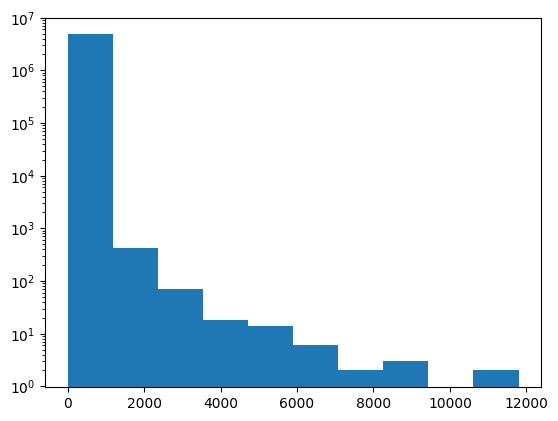

In [187]:
plt.hist(torch.flatten(dt_loc[0:100000,0:48]),log = True)

# Sim Energy Histograms

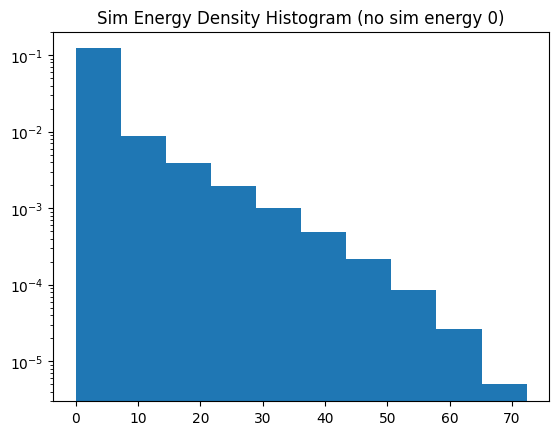

In [66]:
plt.title("Sim Energy Density Histogram (no sim energy 0)")
plt.hist(arr[:,-4], log = True,density = True)
plt.show()

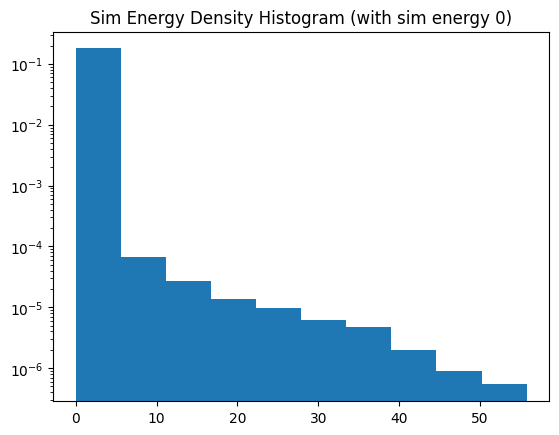

In [67]:
plt.title("Sim Energy Density Histogram (with sim energy 0)")
plt.hist(dt_loc[0:1000000,-4],log = True, density = True)
plt.show()

# Distribution of CACLQ

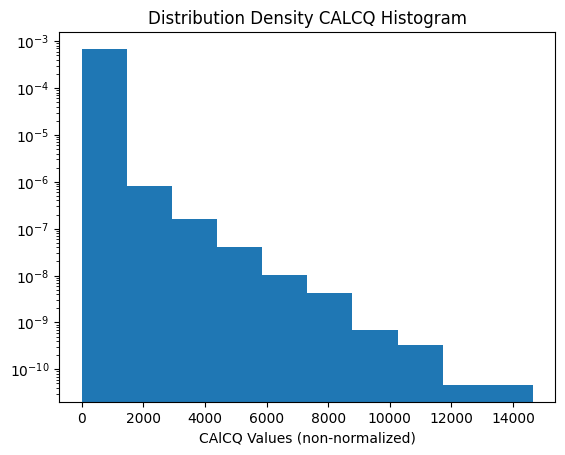

In [68]:
plt.title("Distribution Density CALCQ Histogram")
plt.hist(torch.flatten(arr[:,0:48]), log = True,density = True)
plt.xlabel('CAlCQ Values (non-normalized)')
plt.show()

In [ ]:
plt.title("Distribution Density CALCQ Histogram")
plt.hist(torch.flatten(dt_loc[0:1000000,0:48]), log = True,density = True)
plt.xlabel('CAlCQ Values (non-normalized)')
plt.show()

# Mean Wafer

In [70]:
dt_sum = torch.sum(dt_loc[:,0:48],dim = 1)

In [71]:
arr_sum =torch.sum(arr[:,0:48],dim = 1)

KeyboardInterrupt: 

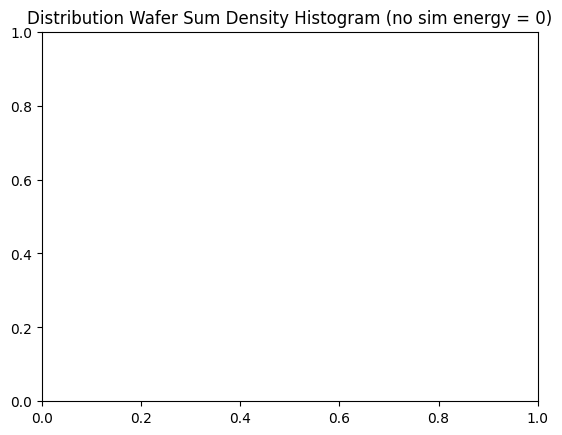

In [72]:
plt.title("Distribution Wafer Sum Density Histogram (no sim energy = 0)")
plt.hist(dt_sum, log = True,density = True)
plt.xlabel('CAlCQ Values (non-normalized)')
plt.show()

In [ ]:
plt.title("Distribution Wafer Sum Density Histogram (with sim energy = 0)")
plt.hist(arr_sum, log = True,density = True)
plt.xlabel('CAlCQ Values (non-normalized)')
plt.show()

# Sum Wafer Vs Sim Energy

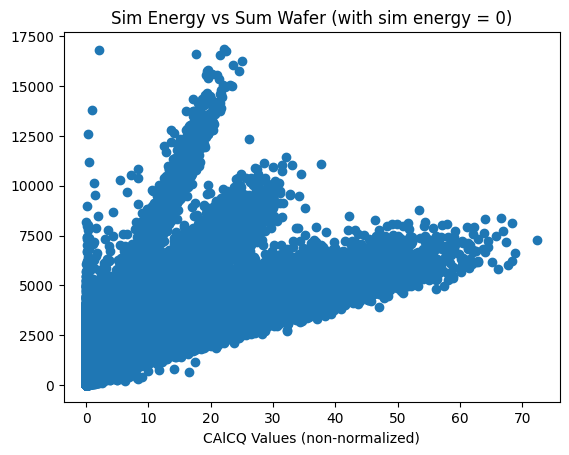

In [73]:
plt.title("Sim Energy vs Sum Wafer (with sim energy = 0)")
plt.scatter(arr[:,-4],arr_sum)
plt.xlabel('CAlCQ Values (non-normalized)')
plt.show()

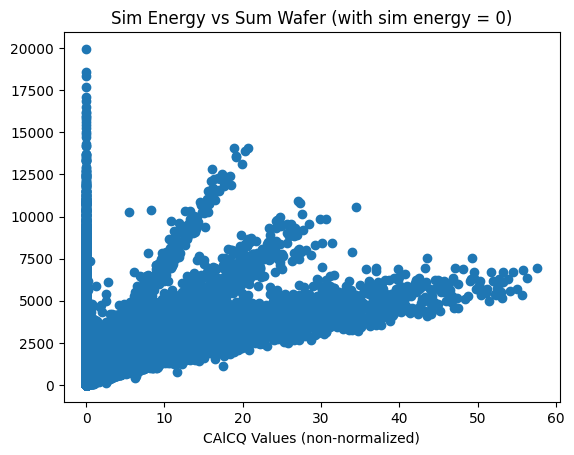

In [74]:
plt.title("Sim Energy vs Sum Wafer (with sim energy = 0)")
plt.scatter(dt_loc[:,-4],dt_sum)
plt.xlabel('CAlCQ Values (non-normalized)')
plt.show()

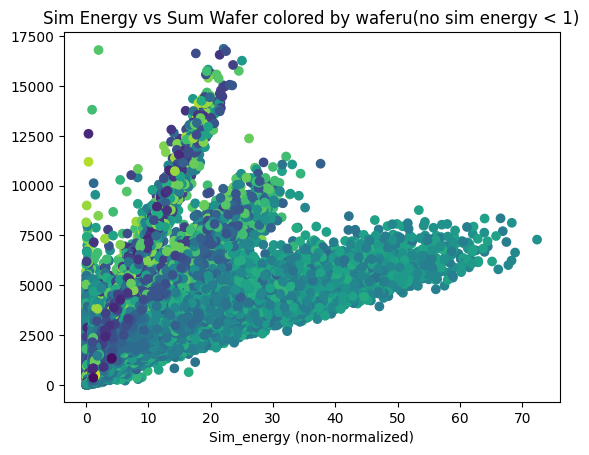

In [75]:
plt.title("Sim Energy vs Sum Wafer colored by waferu(no sim energy < 1)")
plt.scatter(arr[:,-4],arr_sum, c = arr[:,-6])
plt.xlabel('Sim_energy (non-normalized)')
plt.show()

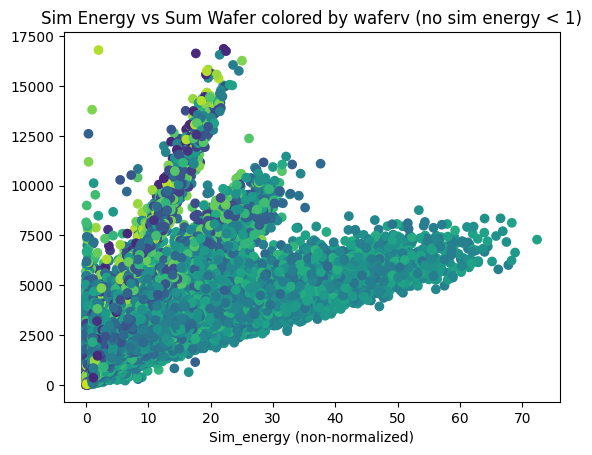

In [76]:
plt.title("Sim Energy vs Sum Wafer colored by waferv (no sim energy < 1)")
plt.scatter(arr[:,-4],arr_sum, c = arr[:,-5])
plt.xlabel('Sim_energy (non-normalized)')
plt.show()

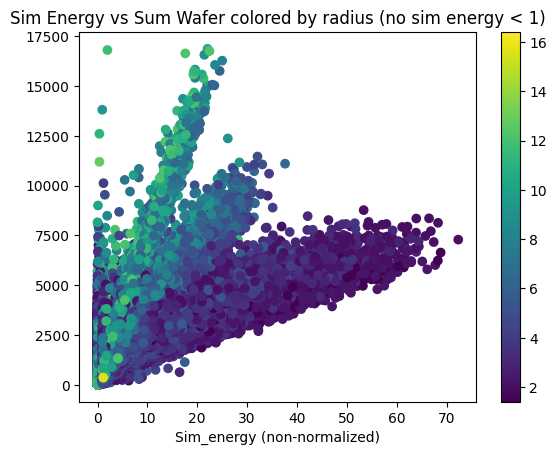

In [77]:

plt.title("Sim Energy vs Sum Wafer colored by radius (no sim energy < 1)")
plt.scatter(arr[:,-4],arr_sum, c = np.sqrt(arr[:,-6]**2+arr[:,-5]**2))
plt.colorbar()
plt.xlabel('Sim_energy (non-normalized)')
plt.show()

In [78]:
w1 = 120/200
w3 = 300/200

In [79]:
r = (arr[:,-6]**2+arr[:,-5]**2)**(0.5)

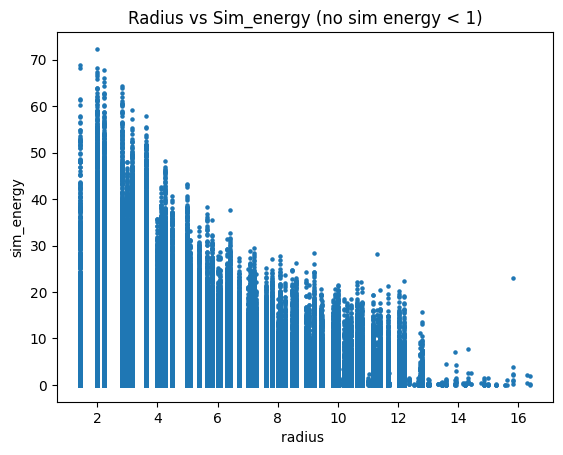

In [80]:
plt.title("Radius vs Sim_energy (no sim energy < 1)")
plt.scatter((arr[:,-6]**2+arr[:,-5]**2)**(0.5),arr[:,-4], s=5)
plt.xlabel('radius ')
plt.ylabel('sim_energy')
plt.show()

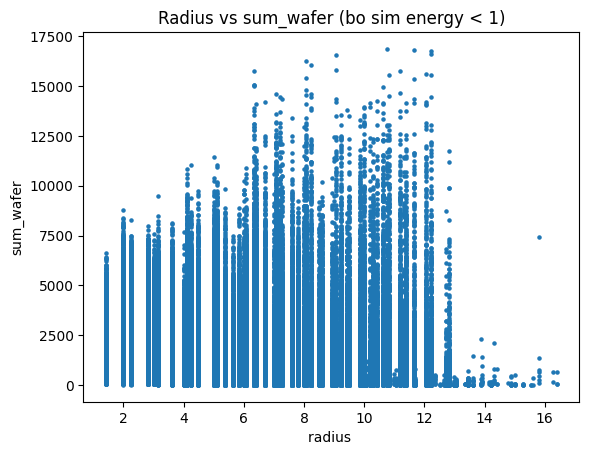

In [81]:
plt.title("Radius vs sum_wafer (bo sim energy < 1)")
plt.scatter((arr[:,-6]**2+arr[:,-5]**2)**(0.5),arr_sum, s=5)
plt.xlabel('radius ')
plt.ylabel('sum_wafer')
plt.show()

In [82]:
storage = np.zeros([23,25,3])
i = 0
for a in arr:
    storage[int(a[-6].detach().numpy().item()+9),int(a[-5].detach().numpy().item()+11)] =  [storage[int(a[-6].detach().numpy().item()+9),int(a[-5].detach().numpy().item()+11)][0]+arr_sum[i], storage[int(a[-6].detach().numpy().item()+9),int(a[-5].detach().numpy().item()+11)][1]+arr[i,-4],storage[int(a[-6].detach().numpy().item()+9),int(a[-5].detach().numpy().item()+11)][2]+1]
    i = i +1   
    
            

In [83]:
mean_storage = storage[:,:,0:2]/torch.unsqueeze(torch.tensor(storage[:,:,2]),dim=2)
mean_storage = torch.nan_to_num(torch.tensor(mean_storage))

/uscms_data/d3/nswood/mambaforge/envs/myenv/lib/python3.10/site-packages/torch/_tensor.py:837: RuntimeWarning: invalid value encountered in multiply
  return self.reciprocal() * other
/tmp/ipykernel_30224/3880981147.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mean_storage = torch.nan_to_num(torch.tensor(mean_storage))


In [84]:
x = []
y = []
val = []
sim_val = []
for i in range(len(mean_storage)):
    for j in range(len(mean_storage[0])):
        
        
        if mean_storage[i,j,0].item() != 0.0:
            x.append(i)
            y.append(j)
            val.append(mean_storage[i,j,0].item())
            sim_val.append(mean_storage[i,j,1].item())
            

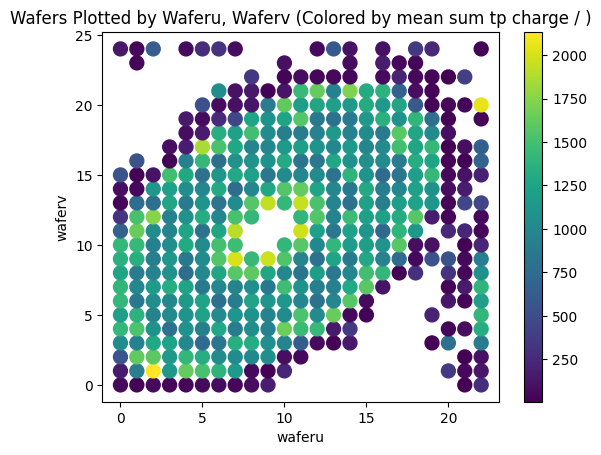

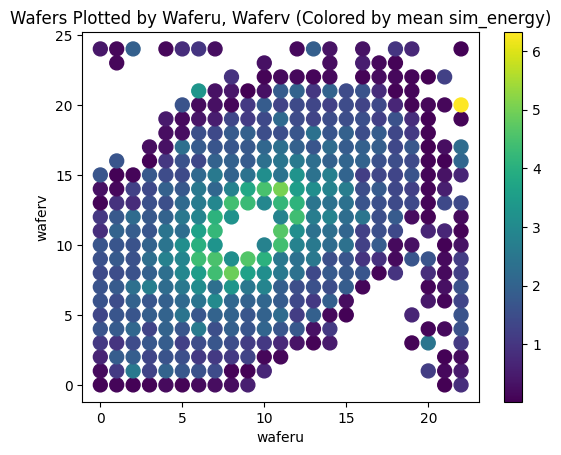

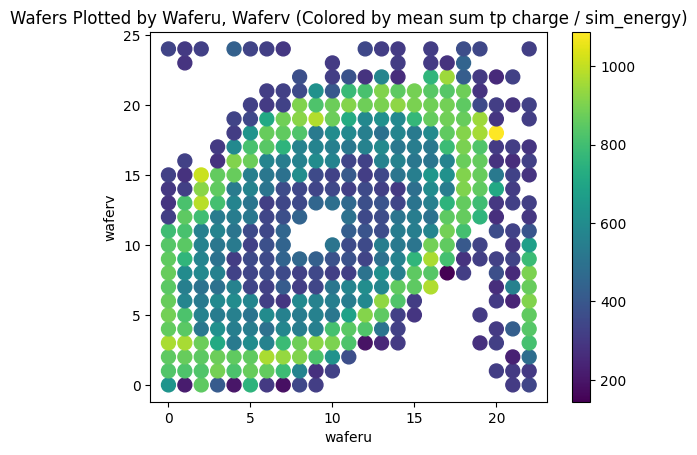

In [98]:
plt.title('Wafers Plotted by Waferu, Waferv (Colored by mean sum tp charge / )')
plt.scatter(x,y, c = val,s=100)
plt.xlabel('waferu')
plt.ylabel('waferv')
plt.colorbar()
plt.show()


'''
ADD SIM ENERGY COLORING TO DIF PLOT

'''
plt.title('Wafers Plotted by Waferu, Waferv (Colored by mean sim_energy)')
plt.scatter(x,y, c = sim_val,s=100)
plt.xlabel('waferu')
plt.ylabel('waferv')
plt.colorbar()
plt.show()

plt.title('Wafers Plotted by Waferu, Waferv (Colored by mean sum tp charge / sim_energy)')
plt.scatter(x,y, c = np.array(val)/np.array(sim_val),s=100)
plt.xlabel('waferu')
plt.ylabel('waferv')
plt.colorbar()
plt.show()

In [99]:
slope =np.array(val)/np.array(sim_val)

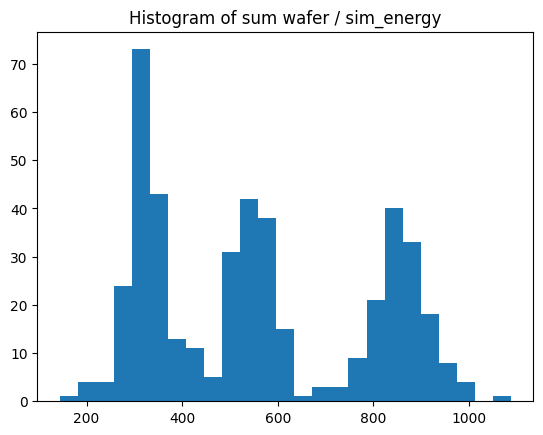

In [87]:
plt.title("Histogram of sum wafer / sim_energy")
plt.hist(slope,bins = 25)
plt.show()

In [157]:
indicator = []
for s in slope:
    if s < 500:
        indicator.append(1)
    elif s <750:
        indicator.append(2)
    else:
        indicator.append(3)

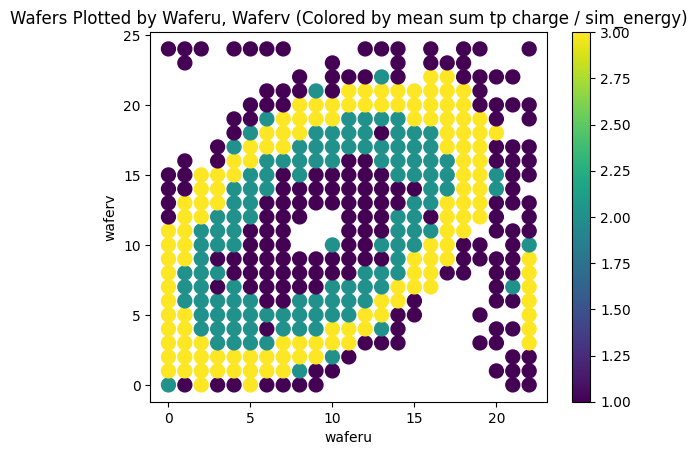

In [159]:
plt.title('Wafers Plotted by Waferu, Waferv (Colored by mean sum tp charge / sim_energy)')
plt.scatter(x,y, c = indicator,s=100)
plt.xlabel('waferu')
plt.ylabel('waferv')
plt.colorbar()
plt.show()

In [160]:
labeled_wafers = torch.hstack([torch.unsqueeze(torch.tensor(x),dim=1),torch.unsqueeze(torch.tensor(y),dim=1),torch.unsqueeze(torch.tensor(indicator),dim=1)])

In [161]:
helping = np.zeros([50,50])
helping[x,y] = indicator
dt_1 = []
dt_2 = []
dt_3 = []

for a in arr:
    pos = [a[-6]+12,a[-5]+12]
    lab = helping[int((a[-6]).item())+12,int((a[-5]).item())+12]
    if lab ==1: 
        dt_1.append(a)
    elif lab ==2: 
        dt_2.append(a)
    else:
        dt_3.append(a)
    
dt_1 = torch.vstack(dt_1).float()
dt_2 = torch.vstack(dt_2).float()   
dt_3 = torch.vstack(dt_3).float()   

In [174]:
dt_1[:,0:48] = (dt_1[:,0:48] - torch.mean(dt_1[:,0:48]))/torch.std(dt_1[:,0:48])
dt_2[:,0:48] = (dt_2[:,0:48] - torch.mean(dt_2[:,0:48]))/torch.std(dt_2[:,0:48])
dt_3[:,0:48] = (dt_3[:,0:48] - torch.mean(dt_3[:,0:48]))/torch.std(dt_3[:,0:48])

In [ ]:
def AE_MSE(data,pred):
    return torch.mean(torch.sum((data-pred)**2,dim=1))

def AE_MAE(data,pred):
    return torch.mean(torch.sum(torch.abs(data-pred),dim=1))

def weighted_AE_MSE(data, pred):
    return torch.mean(torch.sum((data[:,0:48])**2,dim=1)*torch.sum((data-pred)**2,dim=1))

def dif_weighted_AE_MSE(data, pred,alpha = 1):
    return torch.mean(((torch.sum(data[:,0:48]**2,dim=1)**0.5)*alpha+1)*(torch.sum((data-pred)**2,dim=1)))

def log_dif_weighted_AE_MSE(data, pred,alpha = 1):
    return torch.mean(torch.log((torch.sum(data[:,0:48]**2,dim=1)**0.5)*alpha+1)*(torch.sum((data-pred)**2,dim=1)))

In [ ]:
len(dt_1)

In [ ]:
len(dt_2)


In [ ]:

len(dt_3)

In [178]:
size_train =100000
size_test = 20000
train_loc = dt_1[0:size_train]
test_loc = dt_1[-size_test:]
# train = torch.vstack([train,largest[0:1000]] )
train_loc=train_loc[torch.randperm(train_loc.size()[0])]
test_loc=test_loc[torch.randperm(test_loc.size()[0])]
train_loc_d1_flat = DataLoader(
    TensorDataset(torch.Tensor(train_loc)),
    batch_size=100,
    shuffle=False
)

test_loc_d1_flat = DataLoader(
    TensorDataset(torch.Tensor(test_loc)),
    batch_size=100,
    shuffle=False
)

train = dt_1[0:size_train,0:48]
test = dt_1[-size_test:,0:48]
# train = torch.vstack([train,largest[0:1000]] )
train=train[torch.randperm(train.size()[0])]
test=test[torch.randperm(test.size()[0])]
train_d1_flat = DataLoader(
    TensorDataset(torch.Tensor(train)),
    batch_size=100,
    shuffle=False
)

test_d1_flat = DataLoader(
    TensorDataset(torch.Tensor(test)),
    batch_size=100,
    shuffle=False
)

In [179]:
size_train =90000
size_test = 20000
train_loc = dt_2[0:size_train]
test_loc = dt_2[-size_test:]
# train = torch.vstack([train,largest[0:1000]] )
train_loc=train_loc[torch.randperm(train_loc.size()[0])]
test_loc=test_loc[torch.randperm(test_loc.size()[0])]
train_loc_d2_flat = DataLoader(
    TensorDataset(torch.Tensor(train_loc)),
    batch_size=100,
    shuffle=False
)

test_loc_d2_flat = DataLoader(
    TensorDataset(torch.Tensor(test_loc)),
    batch_size=100,
    shuffle=False
)

train = dt_2[0:size_train,0:48]
test = dt_2[-size_test:,0:48]
# train = torch.vstack([train,largest[0:1000]] )
train=train[torch.randperm(train.size()[0])]
test=test[torch.randperm(test.size()[0])]
train_d2_flat = DataLoader(
    TensorDataset(torch.Tensor(train)),
    batch_size=100,
    shuffle=False
)

test_d2_flat = DataLoader(
    TensorDataset(torch.Tensor(test)),
    batch_size=100,
    shuffle=False
)

In [180]:
size_train =50000
size_test = 19000
train_loc = dt_3[0:size_train]
test_loc = dt_3[-size_test:]
# train = torch.vstack([train,largest[0:1000]] )
train_loc=train_loc[torch.randperm(train_loc.size()[0])]
test_loc=test_loc[torch.randperm(test_loc.size()[0])]
train_loc_d3_flat = DataLoader(
    TensorDataset(torch.Tensor(train_loc)),
    batch_size=100,
    shuffle=False
)

test_loc_d3_flat = DataLoader(
    TensorDataset(torch.Tensor(test_loc)),
    batch_size=100,
    shuffle=False
)

train = dt_3[0:size_train,0:48]
test = dt_3[-size_test:,0:48]
# train = torch.vstack([train,largest[0:1000]] )
train=train[torch.randperm(train.size()[0])]
test=test[torch.randperm(test.size()[0])]
train_d3_flat = DataLoader(
    TensorDataset(torch.Tensor(train)),
    batch_size=100,
    shuffle=False
)

test_d3_flat = DataLoader(
    TensorDataset(torch.Tensor(test)),
    batch_size=100,
    shuffle=False
)

In [181]:
num_epochs = 100
lr = 0.00045
loss = AE_MSE

Epoch 0, lr 0.00045
Epoch 0: Train 17.169411291837694, Test 48.049251556396484
Epoch 1, lr 0.00045
Epoch 1: Train 7.877898981809616, Test 21.63523292541504
Epoch 2, lr 0.00045
Epoch 2: Train 4.259482697606087, Test 13.00965690612793
Epoch 3, lr 0.00045
Epoch 3: Train 3.122335113286972, Test 9.902204513549805
Epoch 4, lr 0.00045
Epoch 4: Train 2.6861392463445664, Test 8.523428916931152
Epoch 5, lr 0.00045
Epoch 5: Train 2.4815591658353804, Test 7.877391338348389
Epoch 6, lr 0.00045
Epoch 6: Train 2.3680412921905516, Test 7.512795448303223
Epoch 7, lr 0.00045
Epoch 7: Train 2.29154821395874, Test 7.266813278198242
Epoch 8, lr 0.00045
Epoch 8: Train 2.231933369576931, Test 7.066114902496338
Epoch 9, lr 0.00045
Epoch 9: Train 2.1829435257315635, Test 6.903258323669434
Epoch 10, lr 0.00045
Epoch 10: Train 2.1413646396398542, Test 6.770052909851074
Epoch 11, lr 0.00045
Epoch 11: Train 2.105544157922268, Test 6.658360958099365
Epoch 12, lr 0.00045
Epoch 12: Train 2.074490214109421, Test 6.556

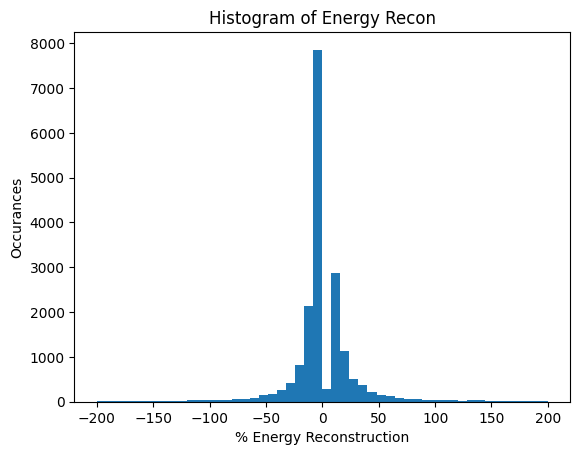

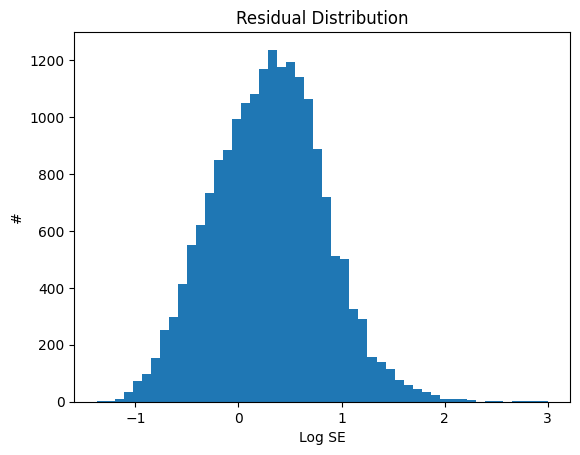

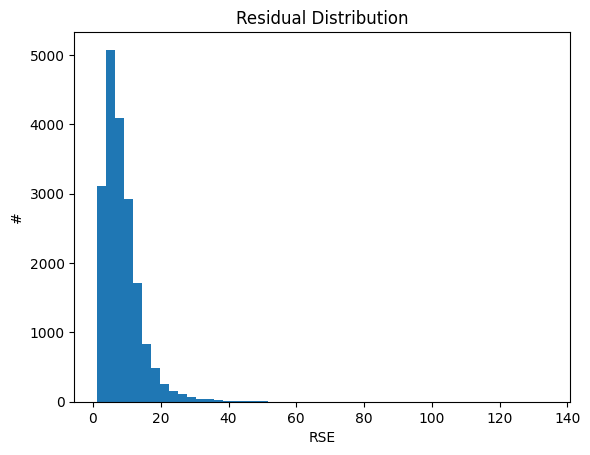

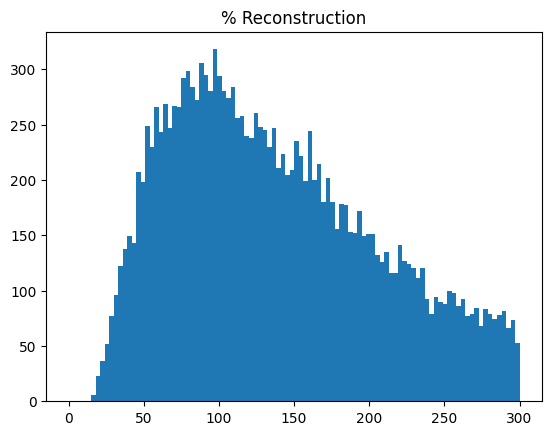

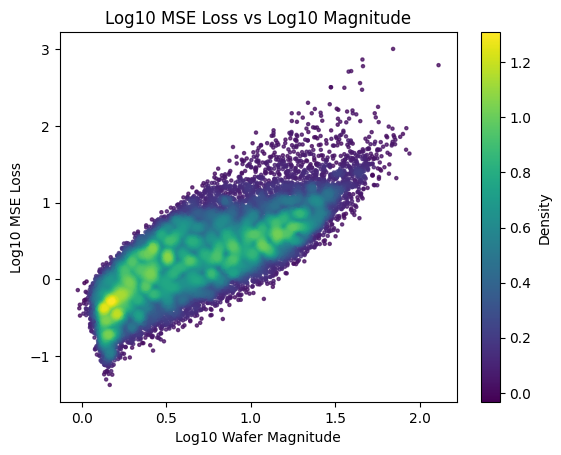

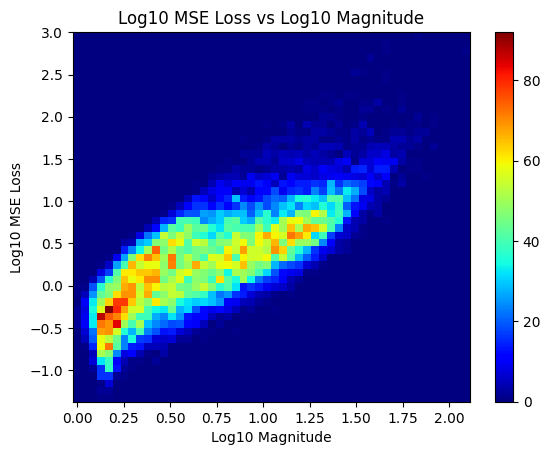

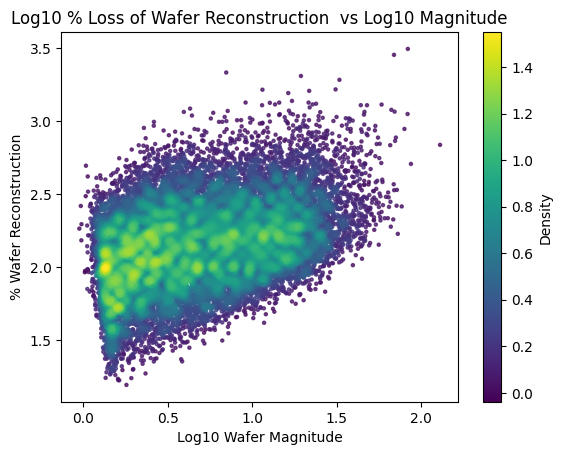

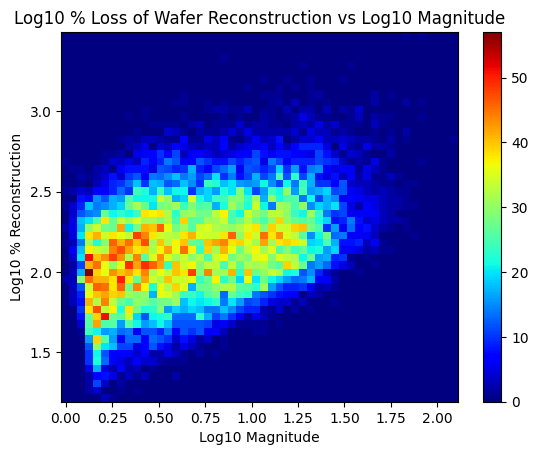

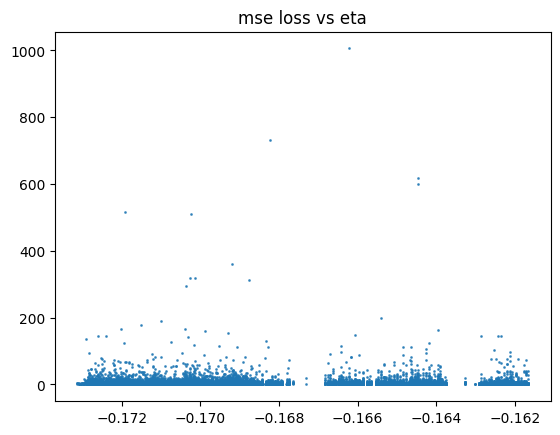

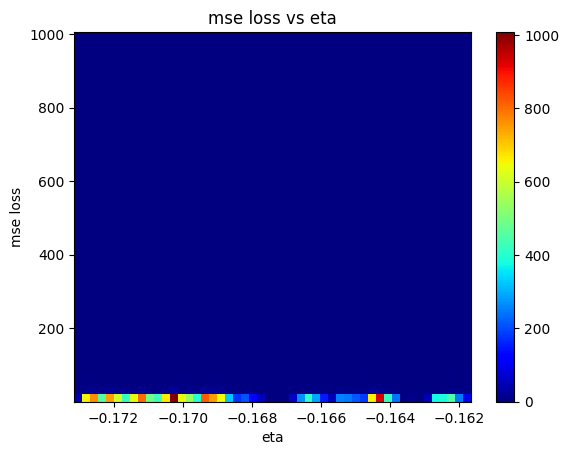

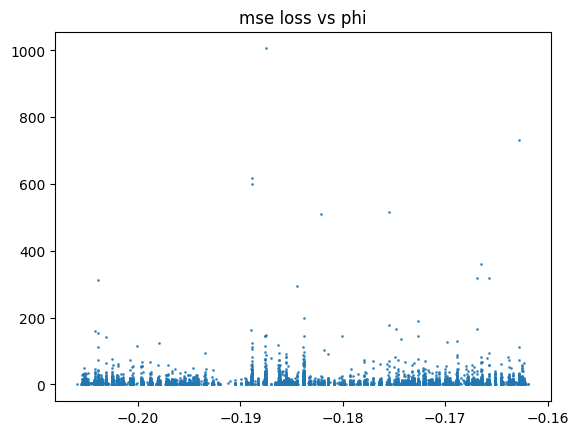

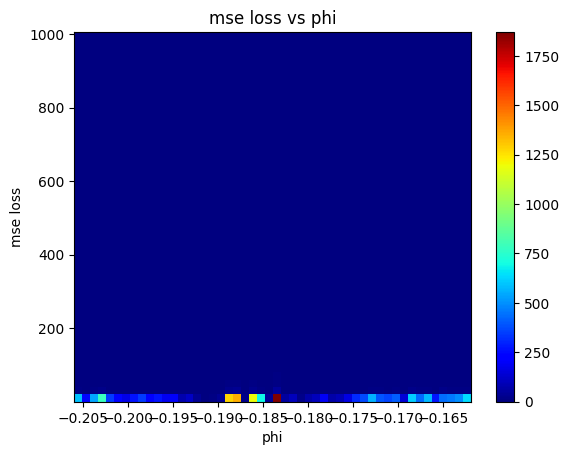

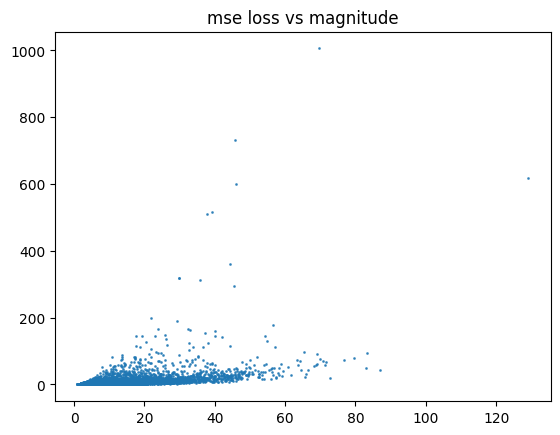

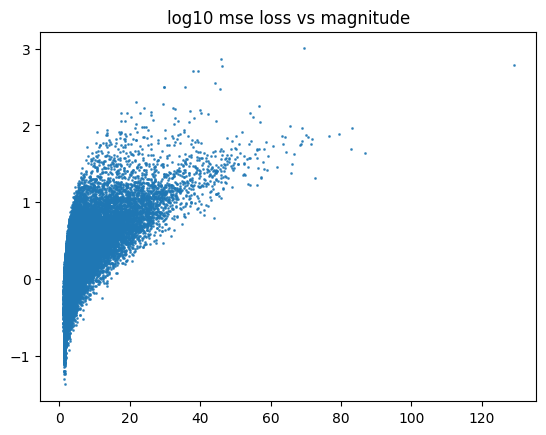

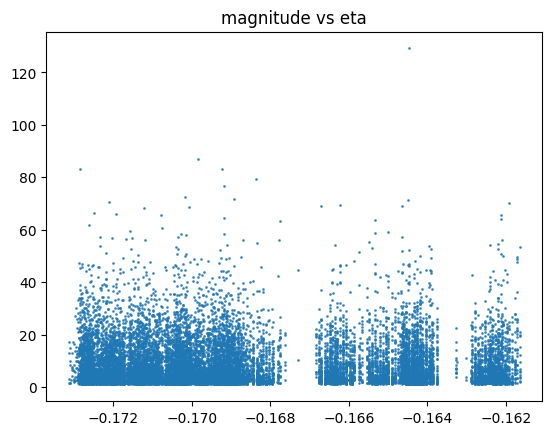

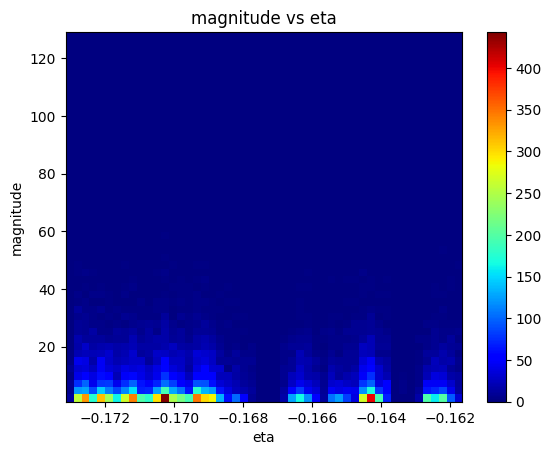

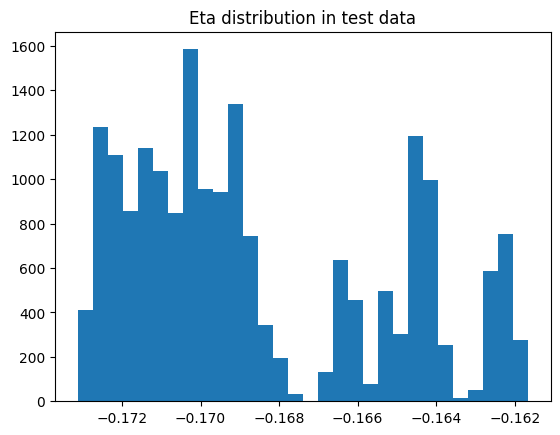

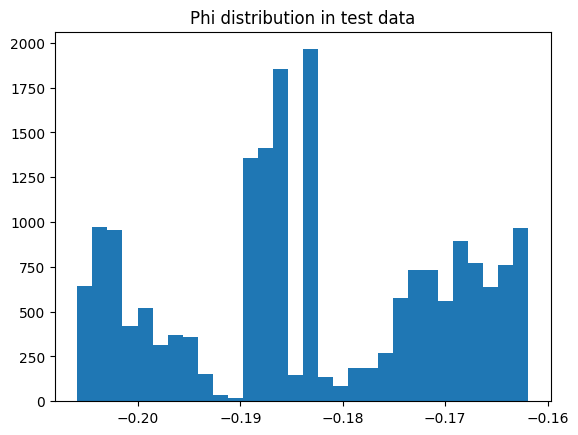

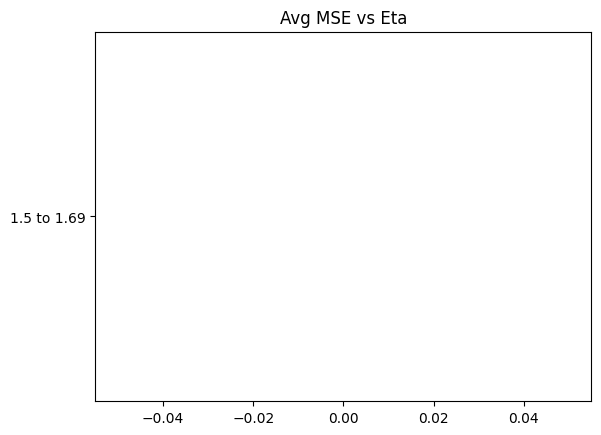

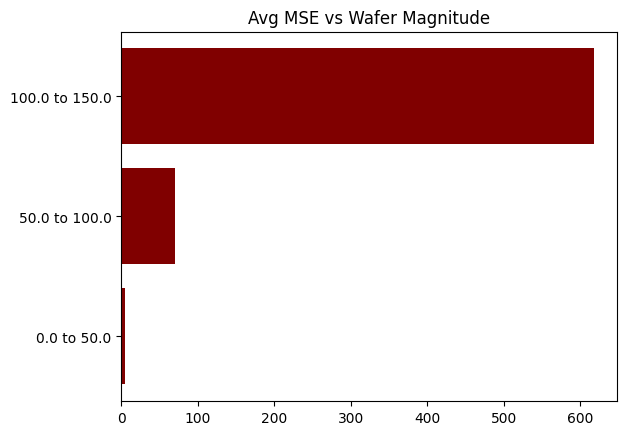

tensor([[-0.1726, -0.1935,  3.2115,  1.7715,  6.5663],
        [-0.1727, -0.1928,  1.7042,  1.3511,  6.7048],
        [-0.1727, -0.1928,  1.2422,  0.9100,  5.1214],
        ...,
        [-0.1730, -0.1828,  3.0761,  2.8044,  6.8415],
        [-0.1728, -0.1899,  5.0282,  2.0105,  6.5913],
        [-0.1731, -0.1852,  3.1093,  3.2646,  7.4616]], grad_fn=<CatBackward0>)

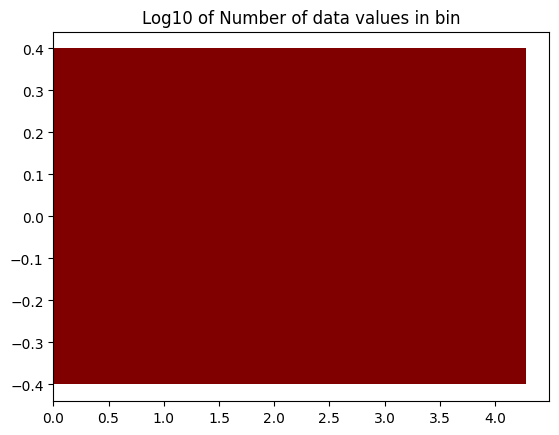

In [182]:
# fine-tune autoencoder
#batch 500


model_1 = Naive_DAE([48,250,16])

optimizer = optim.Adam(model_1.parameters(), lr,weight_decay=5e-2)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min',factor = 0.5)

all_test_losses = []
all_train_losses = []
# train
running_loss = float("inf")
for epoch in range(num_epochs):
    
    losses = []
    
    for i, data_list in enumerate(train_d1_flat):
        model_1.train()
        data = data_list[0]
        v_pred = model_1(data)
        
        batch_loss = loss(data, v_pred) # difference between actual and reconstructed   
        
        
        all_train_losses.append(batch_loss.item())
        losses.append(batch_loss.item())
        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()
    scheduler.step(batch_loss)
    data_test = dt_1[-size_test:,0:48]
    model_1.eval()
    test_pred = model_1(data_test)
    batch_test = loss(data_test, test_pred)
    running_loss = np.mean(losses)
    running_test_loss = batch_test.item()
    print('Epoch {}, lr {}'.format(
        epoch, optimizer.param_groups[0]['lr']))
    
    print(f"Epoch {epoch}: Train {running_loss}, Test {running_test_loss}")
model_1.eval()
AE_Stats.gen_all_stats(model_1(dt_1[-size_test:,0:48]),dt_1[-size_test:,0:48],dt_3[-size_test:])


Epoch 0, lr 0.00045
Epoch 0: Train 18.657753609286413, Test 45.5730094909668
Epoch 1, lr 0.00045
Epoch 1: Train 8.552002899514305, Test 21.583332061767578
Epoch 2, lr 0.00045
Epoch 2: Train 4.626680617994732, Test 12.414173126220703
Epoch 3, lr 0.00045
Epoch 3: Train 3.257995175388124, Test 9.272001266479492
Epoch 4, lr 0.00045
Epoch 4: Train 2.7524613148636288, Test 8.118719100952148
Epoch 5, lr 0.00045
Epoch 5: Train 2.5275008845329285, Test 7.5709919929504395
Epoch 6, lr 0.00045
Epoch 6: Train 2.4005147132608626, Test 7.2604804039001465
Epoch 7, lr 0.00045
Epoch 7: Train 2.314290386305915, Test 7.042653560638428
Epoch 8, lr 0.00045
Epoch 8: Train 2.245180595450931, Test 6.8394036293029785
Epoch 9, lr 0.00045
Epoch 9: Train 2.1903557749589284, Test 6.6828789710998535
Epoch 10, lr 0.00045
Epoch 10: Train 2.1438247736295066, Test 6.551545143127441
Epoch 11, lr 0.00045
Epoch 11: Train 2.102774387598038, Test 6.427698135375977
Epoch 12, lr 0.00045
Epoch 12: Train 2.0677373935778935, Test

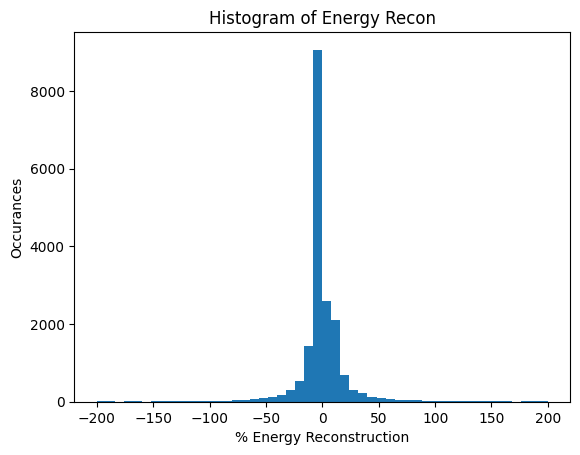

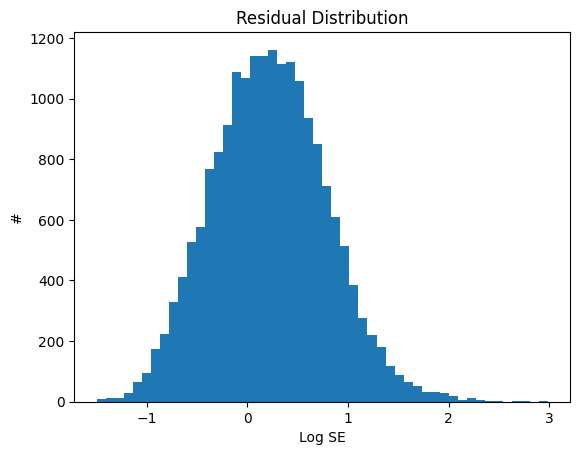

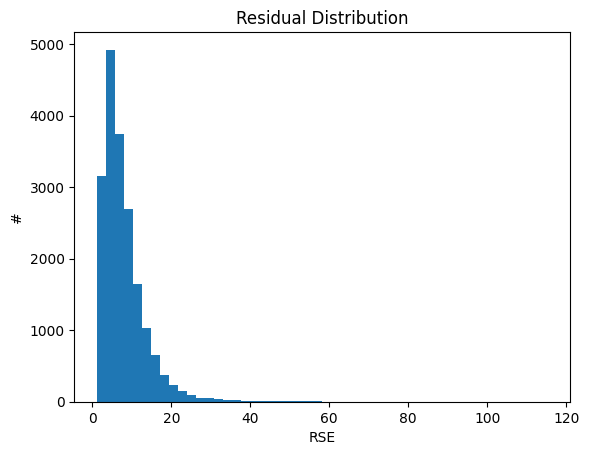

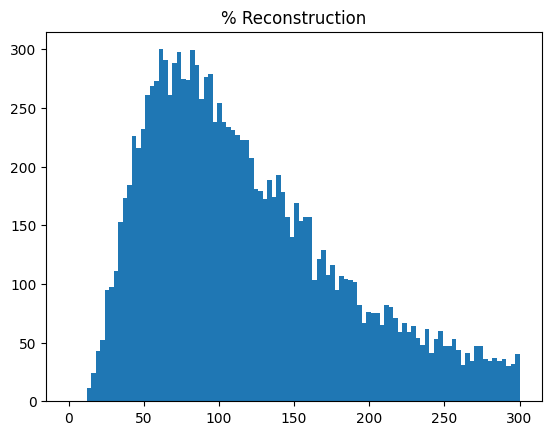

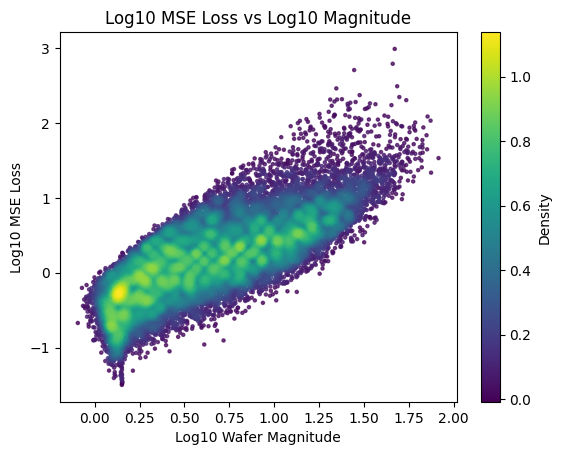

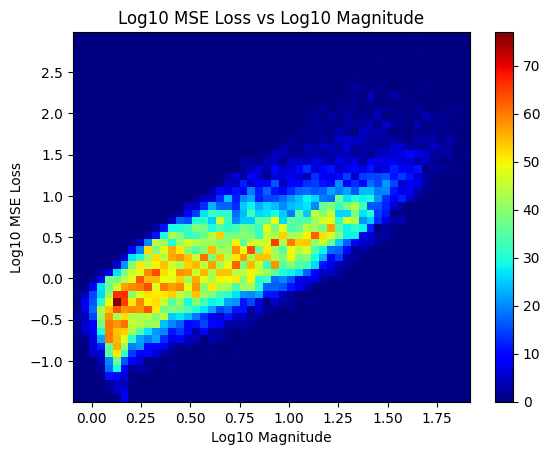

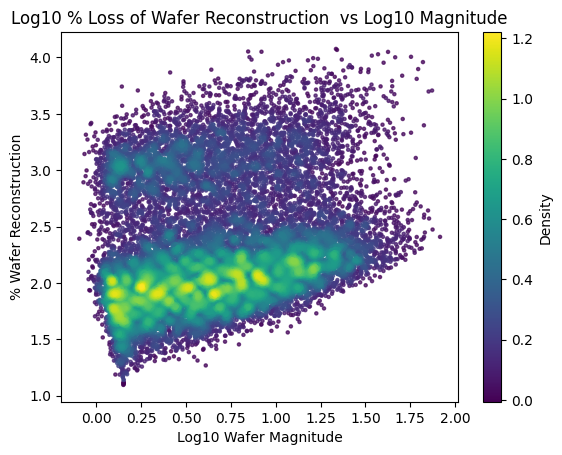

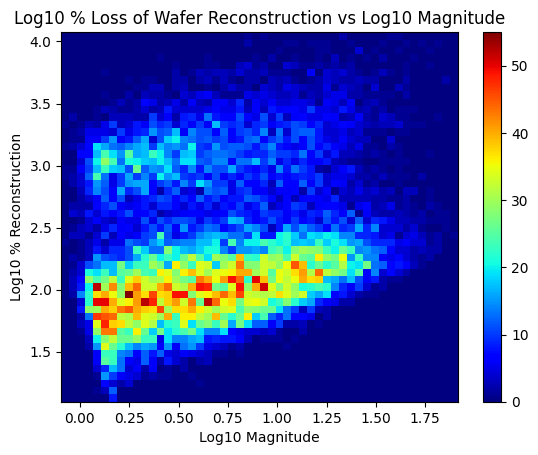

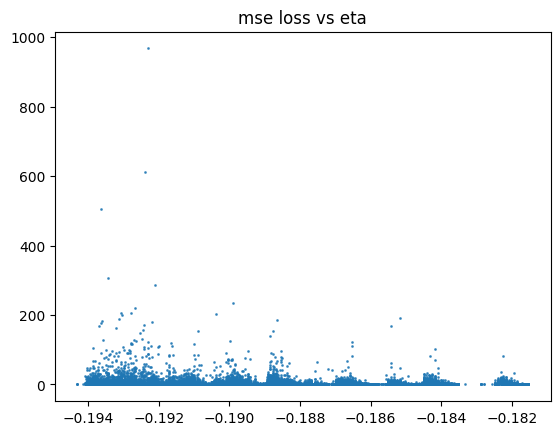

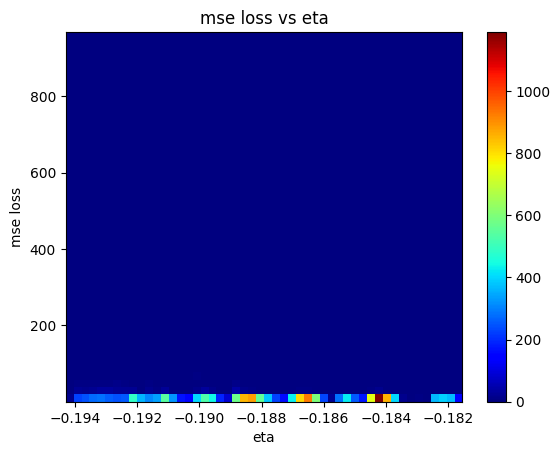

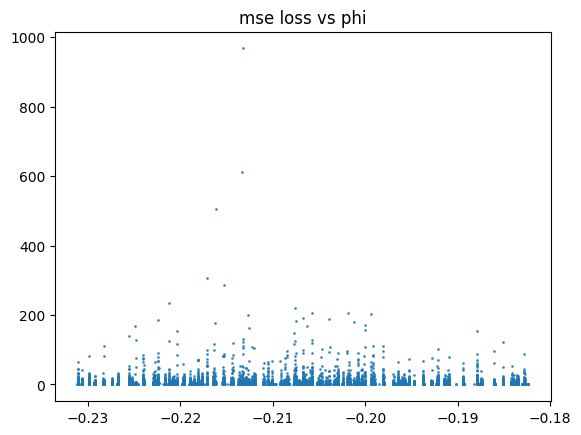

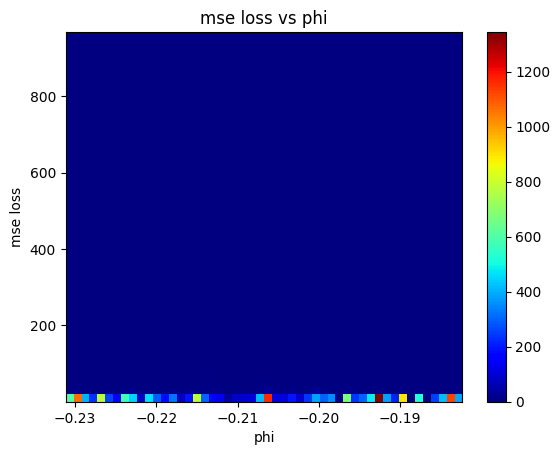

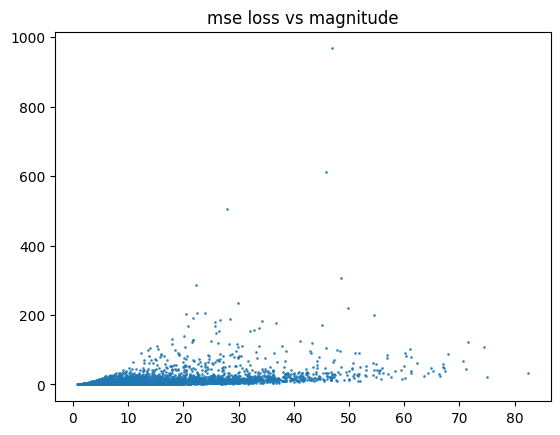

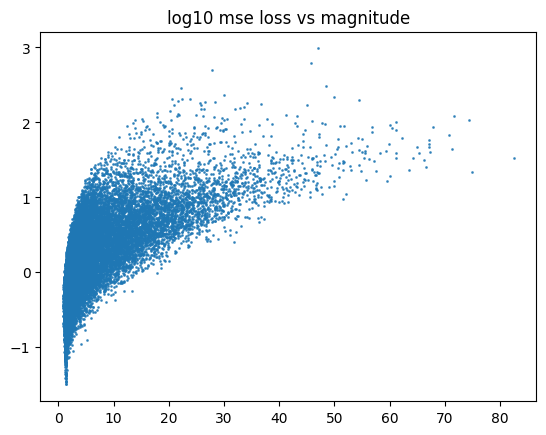

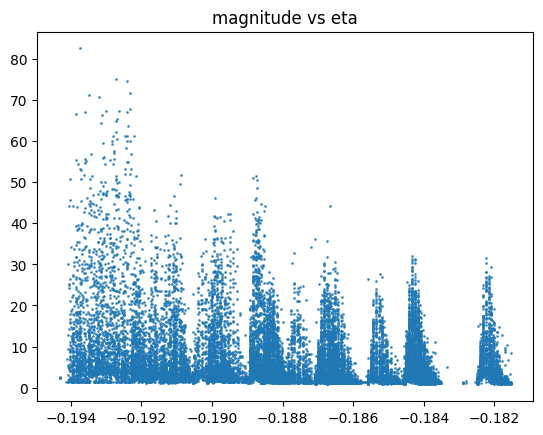

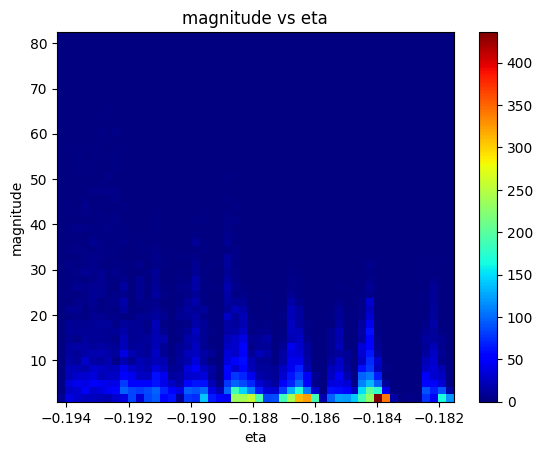

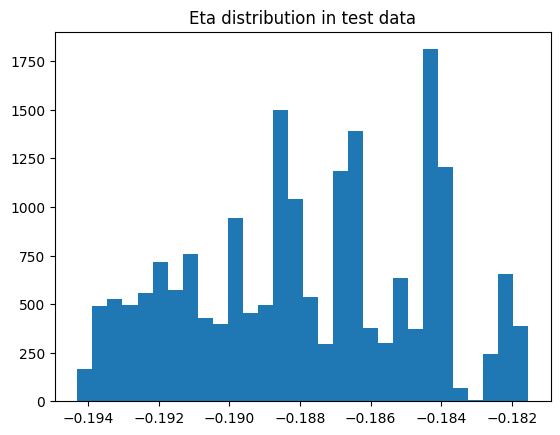

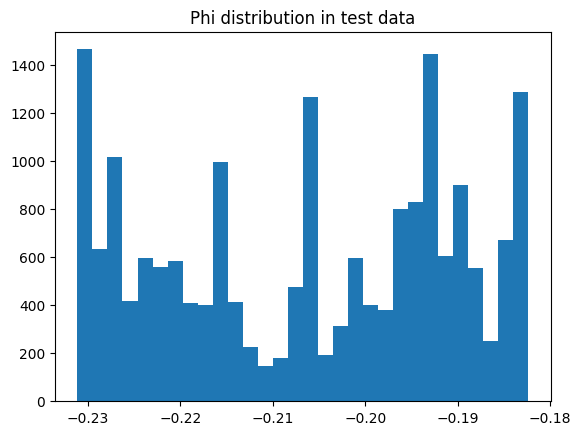

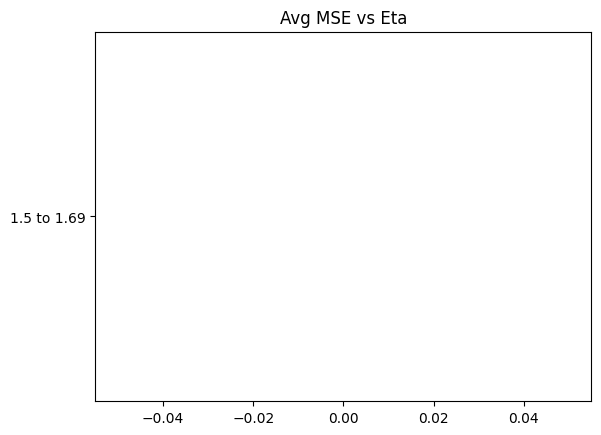

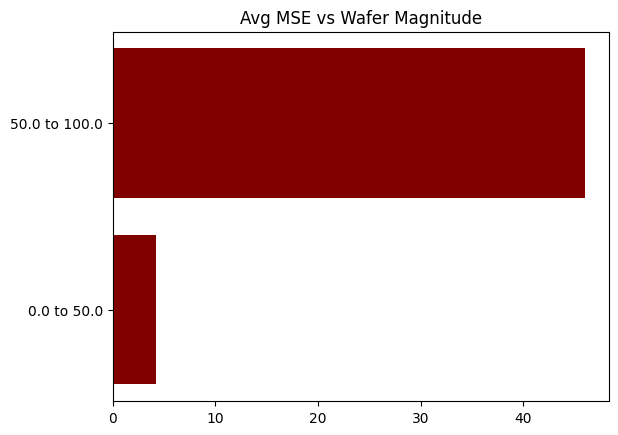

tensor([[-0.1845, -0.2268,  1.6324,  1.6416,  7.2261],
        [-0.1845, -0.2268,  4.5373,  4.5429, 11.1723],
        [-0.1845, -0.2268,  2.0598,  2.6644,  8.8006],
        ...,
        [-0.1940, -0.2225,  6.9379,  1.3496,  6.2060],
        [-0.1937, -0.2138,  3.0784,  0.7206,  4.3586],
        [-0.1939, -0.2083,  4.6289,  0.9753,  4.5791]], grad_fn=<CatBackward0>)

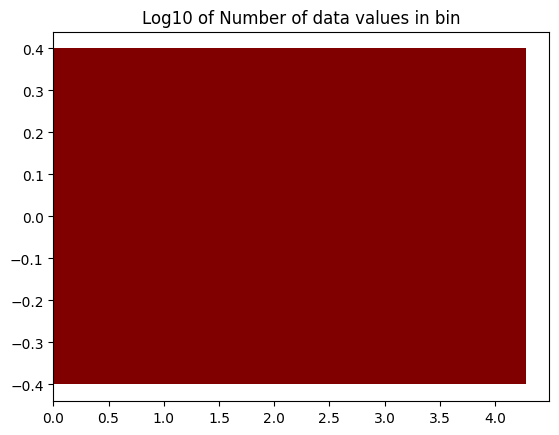

In [183]:
# fine-tune autoencoder
#batch 500


model_2 = Naive_DAE([48,250,16])

optimizer = optim.Adam(model_2.parameters(), lr,weight_decay=5e-2)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min',factor = 0.5)

all_test_losses = []
all_train_losses = []
# train
running_loss = float("inf")
for epoch in range(num_epochs):
    
    losses = []
    
    for i, data_list in enumerate(train_d2_flat):
        model_2.train()
        data = data_list[0]
        v_pred = model_2(data)
        
        batch_loss = loss(data, v_pred) # difference between actual and reconstructed   
        
        
        all_train_losses.append(batch_loss.item())
        losses.append(batch_loss.item())
        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()
    scheduler.step(batch_loss)
    data_test = dt_2[-size_test:,0:48]
    model_2.eval()
    test_pred = model_2(data_test)
    batch_test = loss(data_test, test_pred)
    running_loss = np.mean(losses)
    running_test_loss = batch_test.item()
    print('Epoch {}, lr {}'.format(
        epoch, optimizer.param_groups[0]['lr']))
    
    print(f"Epoch {epoch}: Train {running_loss}, Test {running_test_loss}")
model_2.eval()
AE_Stats.gen_all_stats(model_2(dt_2[-size_test:,0:48]),dt_2[-size_test:,0:48],dt_2[-size_test:])


In [1]:
# fine-tune autoencoder
#batch 500


model_3 = Naive_DAE([48,250,16])

optimizer = optim.Adam(model_3.parameters(), lr,weight_decay=5e-2)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min',factor = 0.5)

all_test_losses = []
all_train_losses = []
# train
running_loss = float("inf")
for epoch in range(num_epochs):
    
    losses = []
    
    for i, data_list in enumerate(train_d3_flat):
        model_3.train()
        data = data_list[0]
        v_pred = model_3(data)
        
        batch_loss = loss(data, v_pred) # difference between actual and reconstructed   
        
        
        all_train_losses.append(batch_loss.item())
        losses.append(batch_loss.item())
        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()
    scheduler.step(batch_loss)
    data_test = dt_3[-size_test:,0:48]
    model_3.eval()
    test_pred = model_3(data_test)
    batch_test = loss(data_test, test_pred)
    running_loss = np.mean(losses)
    running_test_loss = batch_test.item()
    print('Epoch {}, lr {}'.format(
        epoch, optimizer.param_groups[0]['lr']))
    
    print(f"Epoch {epoch}: Train {running_loss}, Test {running_test_loss}")
model_3.eval()
AE_Stats.gen_all_stats(model_3(dt_3[-size_test:,0:48]),dt_3[-size_test:,0:48],dt_3[-size_test:])


NameError: name 'Naive_DAE' is not defined